In [1]:
import torch
import tensorflow as tf
%load_ext autoreload

# enable GPU
device = "mps" if torch.backends.mps.is_available() else "cpu"
x = torch.rand(size=(3, 4)).to(device)

gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 1:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    print("Nutze GPU:", gpus[1])

In [2]:
%autoreload 2
from data_loader import load_image_data
import config

X_train_299, X_val_299, y_train_299, y_val_299, label_map_299 = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(299, 299),
    images_per_label=config.IMAGES_PER_LABEL,
    validation_split=0.2,
)

X_train_224, X_val_224, y_train_224, y_val_224, label_map_224 = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(224, 224),
    images_per_label=config.IMAGES_PER_LABEL,
    validation_split=0.2,
)

X_train_300, X_val_300, y_train_300, y_val_300, label_map_300 = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(300, 300),
    images_per_label=config.IMAGES_PER_LABEL,
    validation_split=0.2,
    preprocessing="efficient"
)

Error loading /Users/fionanueesch/Documents/PERS/CAS Machine Inelligence/M3 Deep Learning/Project/DockerDeepLearning/data/plant_data/PlantVillage/Tomato_Septoria_leaf_spot/33da87e2-f2c6-4a99-bc3c-279f47120681___JR_Sept.L.S 2667.JPG: cannot identify image file '/Users/fionanueesch/Documents/PERS/CAS Machine Inelligence/M3 Deep Learning/Project/DockerDeepLearning/data/plant_data/PlantVillage/Tomato_Septoria_leaf_spot/33da87e2-f2c6-4a99-bc3c-279f47120681___JR_Sept.L.S 2667.JPG'


In [4]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results
import config

# EfficientNetB0

results = evaluate_model(
    X_train_224,
    X_val_224,
    y_train_224,
    y_val_224,
    label_map_224,
    'EfficientNetB0',
    config.EPOCHS
)

update_results(results, "results_efficientnet_b0.pkl")

2025-06-10 20:28:06.571888: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-10 20:28:06.571915: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-06-10 20:28:06.571918: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-06-10 20:28:06.571929: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-10 20:28:06.571939: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


['simple', 'dense_dropout', 'batchnorm_dropout']
simple
<function head_simple at 0x347f1bf40>
Training EfficientNetB0 with head simple...


2025-06-10 20:28:09.102795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Evaluating EfficientNetB0 with head simple...
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step
dense_dropout
<function head_dense_dropout at 0x347f1beb0>
Training EfficientNetB0 with head dense_dropout...
Evaluating EfficientNetB0 with head dense_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step
batchnorm_dropout
<function head_batchnorm_dropout at 0x347f1be20>
Training EfficientNetB0 with head batchnorm_dropout...
Evaluating EfficientNetB0 with head batchnorm_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step


In [4]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results
import config

#EfficientNetB3

results = evaluate_model(
    X_train_300,
    X_val_300,
    y_train_300,
    y_val_300,
    label_map_300,
    'EfficientNetB3',
    config.EPOCHS
)

update_results(results,"results_efficientnet_b3.pkl" )

['simple', 'dense_dropout', 'batchnorm_dropout']
simple
<function head_simple at 0x3a3766320>
Training EfficientNetB3 with head simple...


2025-06-11 18:06:37.221235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Evaluating EfficientNetB3 with head simple...
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 519ms/step
dense_dropout
<function head_dense_dropout at 0x3a3767520>
Training EfficientNetB3 with head dense_dropout...
Evaluating EfficientNetB3 with head dense_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 537ms/step
batchnorm_dropout
<function head_batchnorm_dropout at 0x3a3767d90>
Training EfficientNetB3 with head batchnorm_dropout...
Evaluating EfficientNetB3 with head batchnorm_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 541ms/step


In [6]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results
import config

#InceptionV3

results = evaluate_model(
    X_train_299,
    X_val_299,
    y_train_299,
    y_val_299,
    label_map_299,
    'InceptionV3',
    config.EPOCHS
)

update_results(results, "results_inceptionv3.pkl")

['simple', 'dense_dropout']
simple
<function head_simple at 0x347f1bf40>
Training InceptionV3 with head simple...
Evaluating InceptionV3 with head simple...
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 265ms/step
dense_dropout
<function head_dense_dropout at 0x347f1beb0>
Training InceptionV3 with head dense_dropout...
Evaluating InceptionV3 with head dense_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 280ms/step


In [7]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results
import config

#MobileNetV2

results = evaluate_model(
    X_train_224,
    X_val_224,
    y_train_224,
    y_val_224,
    label_map_224,
    'MobileNetV2',
    config.EPOCHS
)

update_results(results, "results_mobilenet.pkl")

['simple', 'dense_dropout']
simple
<function head_simple at 0x347f1bf40>
Training MobileNetV2 with head simple...
Evaluating MobileNetV2 with head simple...
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 145ms/step
dense_dropout
<function head_dense_dropout at 0x347f1beb0>
Training MobileNetV2 with head dense_dropout...
Evaluating MobileNetV2 with head dense_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step


In [8]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results
import config

#DenseNet121

results = evaluate_model(
    X_train_224,
    X_val_224,
    y_train_224,
    y_val_224,
    label_map_224,
    'DenseNet121',
    config.EPOCHS
)

update_results(results, "results_densenet.pkl")

['simple', 'dense_dropout']
simple
<function head_simple at 0x347f1bf40>
Training DenseNet121 with head simple...
Evaluating DenseNet121 with head simple...
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 442ms/step
dense_dropout
<function head_dense_dropout at 0x347f1beb0>
Training DenseNet121 with head dense_dropout...
Evaluating DenseNet121 with head dense_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 355ms/step


In [9]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results
import config

#Xception

results = evaluate_model(
    X_train_299,
    X_val_299,
    y_train_299,
    y_val_299,
    label_map_299,
    'Xception',
    config.EPOCHS
)

update_results(results, "results_xception.pkl")

['simple', 'dense_dropout']
simple
<function head_simple at 0x347f1bf40>
Training Xception with head simple...
Evaluating Xception with head simple...
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 359ms/step
dense_dropout
<function head_dense_dropout at 0x347f1beb0>
Training Xception with head dense_dropout...
Evaluating Xception with head dense_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 359ms/step


,backbone,head,accuracy,f1_score,end_val_loss,history,y_true,y_pred
0,EfficientNetB3,simple,0.944162,0.944477,0.190175,"{'accuracy': [0.5955103635787964, 0.8098263740...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ..."
1,EfficientNetB3,dense_dropout,0.932318,0.932024,0.313093,"{'accuracy': [0.44684454798698425, 0.678949594...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ..."
2,EfficientNetB3,batchnorm_dropout,0.930626,0.930368,0.420590,"{'accuracy': [0.6018636226654053, 0.7323167920...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ..."
10,DenseNet121,simple,0.910321,0.910676,0.294838,"{'accuracy': [0.4506565034389496, 0.7484117150...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ..."
11,DenseNet121,dense_dropout,0.883249,0.884599,0.470011,"{'accuracy': [0.2524354159832001, 0.5120711326...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ...","[7, 11, 7, 3, 13, 3, 9, 7, 13, 9, 2, 0, 12, 8,..."
4,MobileNetV2,dense_dropout,0.883249,0.882755,0.692055,"{'accuracy': [0.33418044447898865, 0.587462961...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ...","[7, 11, 7, 3, 13, 3, 8, 7, 13, 8, 2, 0, 12, 8,..."
3,MobileNetV2,simple,0.881557,0.881028,0.427748,"{'accuracy': [0.5912748575210571, 0.8229563832...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ...","[7, 11, 7, 3, 13, 3, 8, 7, 13, 8, 2, 0, 12, 8,..."
8,InceptionV3,simple,0.878173,0.876897,0.393035,"{'accuracy': [0.5412960648536682, 0.7916136980...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ...","[7, 10, 7, 3, 8, 3, 9, 7, 13, 8, 2, 0, 12, 8, ..."
12,Xception,simple,0.859560,0.860330,0.415788,"{'accuracy': [0.5561202764511108, 0.7674714326...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ...","[7, 12, 7, 3, 8, 3, 10, 7, 13, 8, 2, 0, 12, 11..."
13,Xception,dense_dropout,0.854484,0.853792,0.588149,"{'accuracy': [0.405760258436203, 0.63617110252...","[7, 10, 7, 3, 8, 3, 8, 7, 13, 8, 2, 0, 12, 8, ...","[7, 12, 7, 3, 8, 3, 10, 7, 13, 8, 2, 0, 12, 8,..."


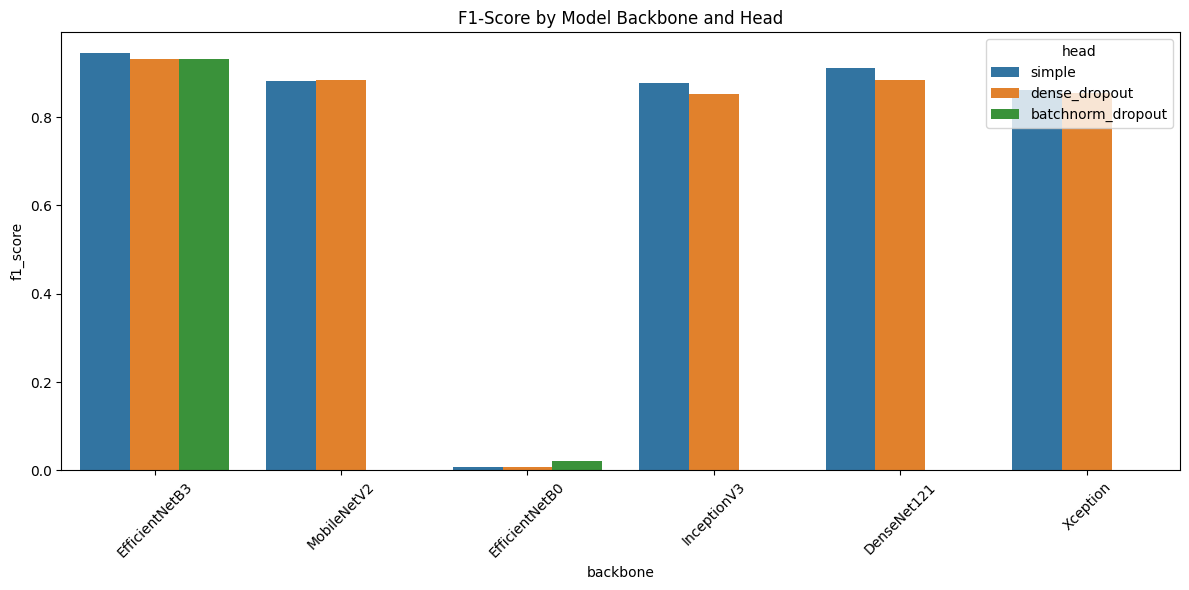

Model: EfficientNetB3 + simple, F1-Score: 94.45%, Accuracy: 94.42%, Final Val_loss: 19.02%


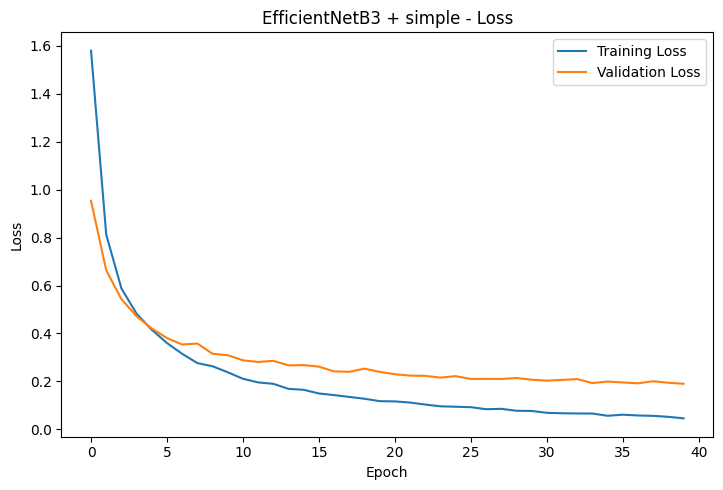

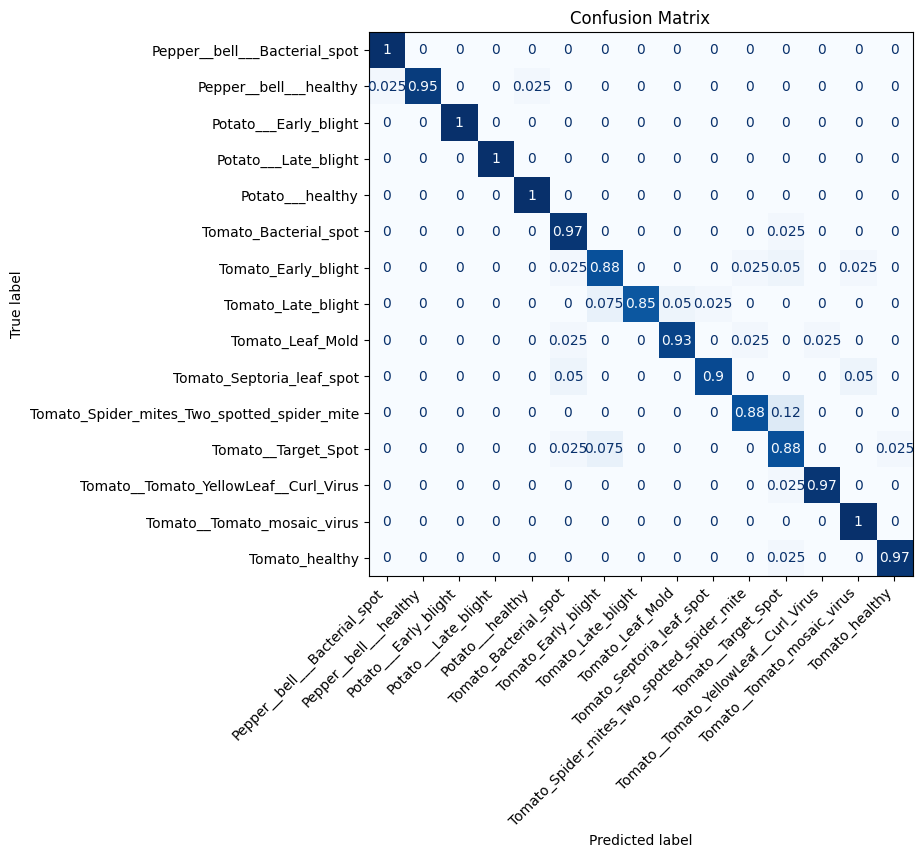

Model: EfficientNetB3 + dense_dropout, F1-Score: 93.20%, Accuracy: 93.23%, Final Val_loss: 31.31%


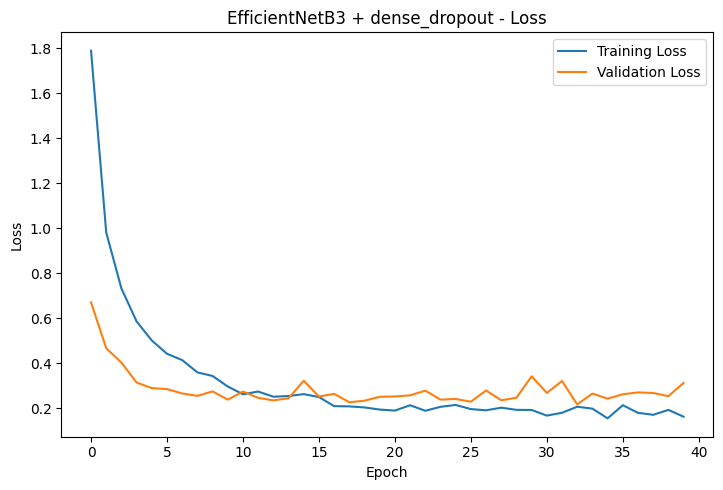

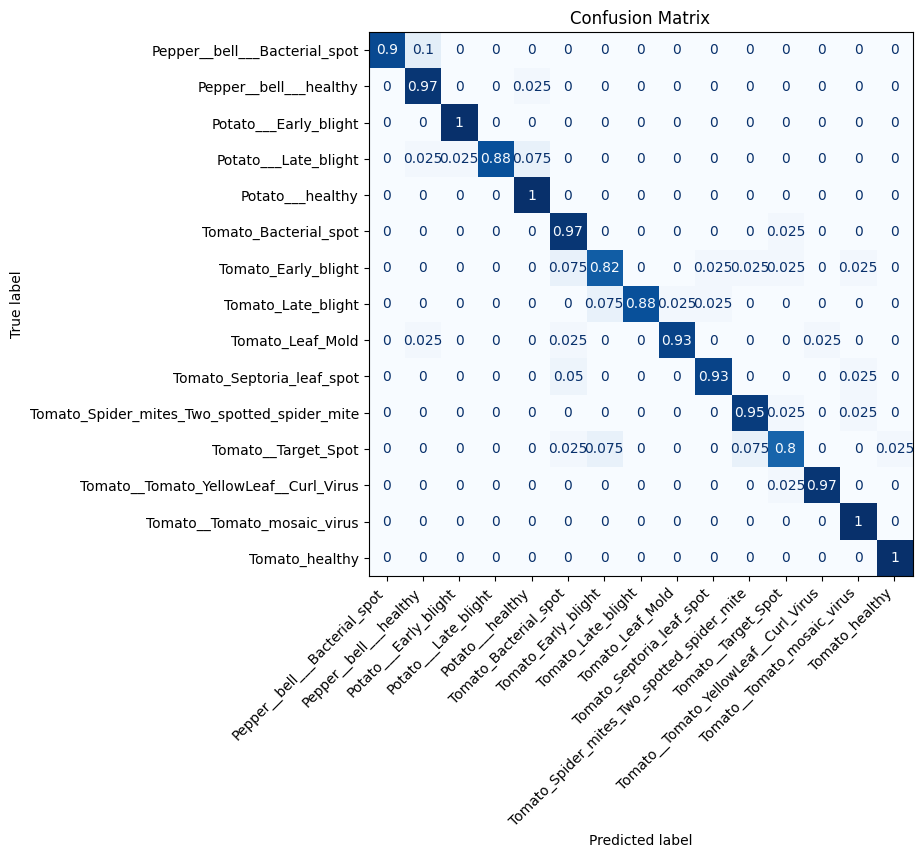

Model: EfficientNetB3 + batchnorm_dropout, F1-Score: 93.04%, Accuracy: 93.06%, Final Val_loss: 42.06%


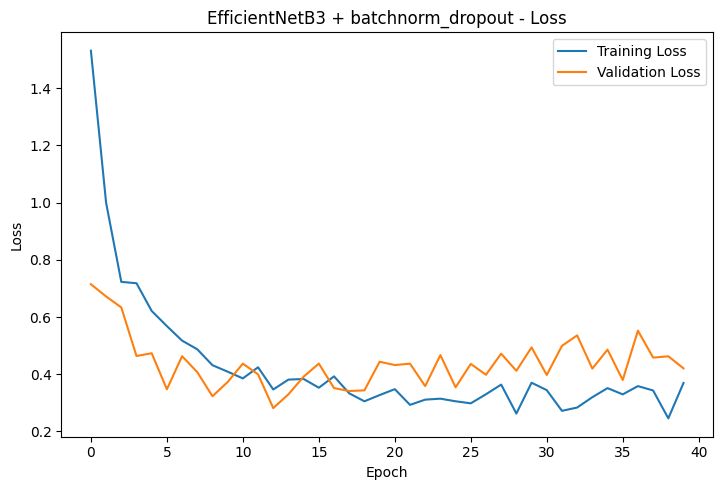

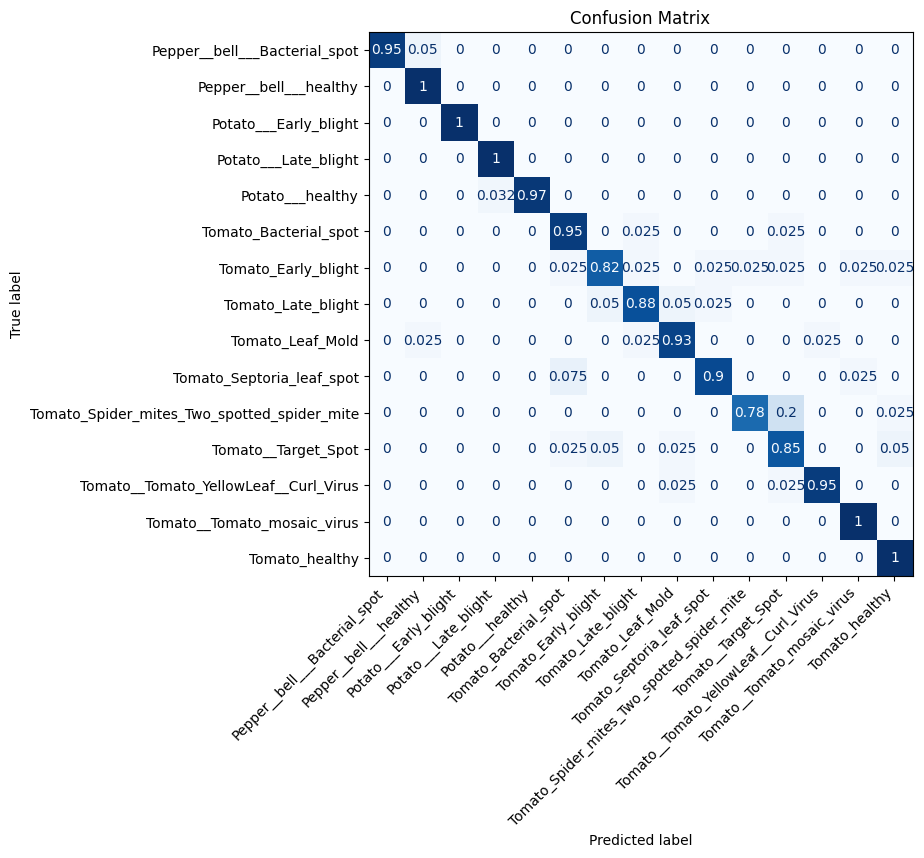

Model: MobileNetV2 + simple, F1-Score: 88.10%, Accuracy: 88.16%, Final Val_loss: 42.77%


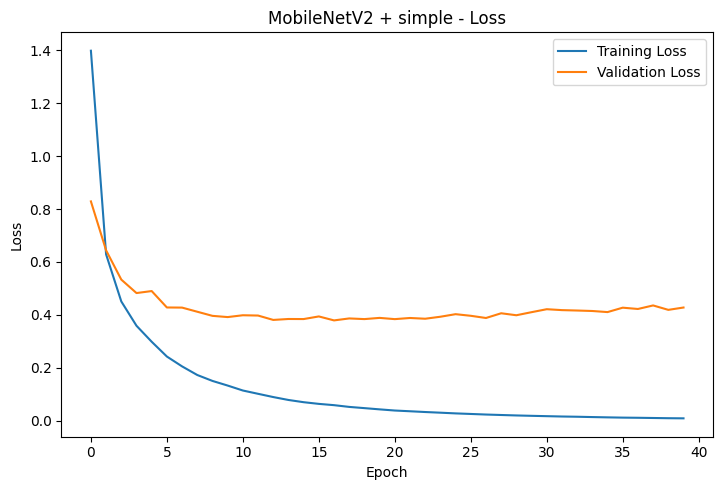

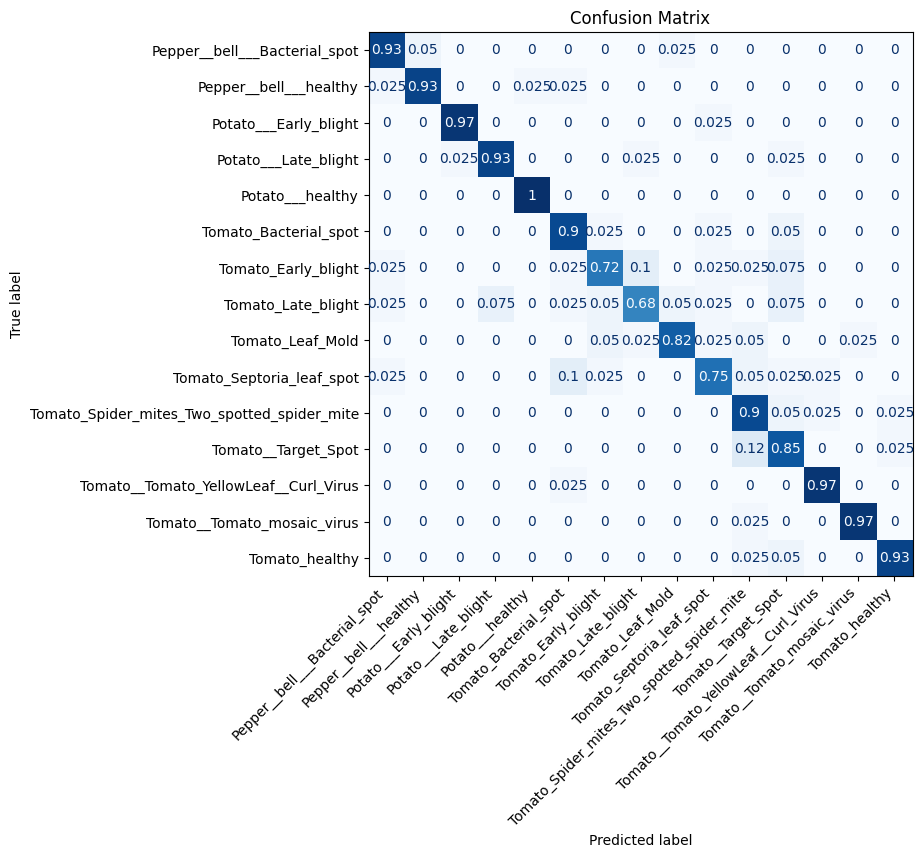

Model: MobileNetV2 + dense_dropout, F1-Score: 88.28%, Accuracy: 88.32%, Final Val_loss: 69.21%


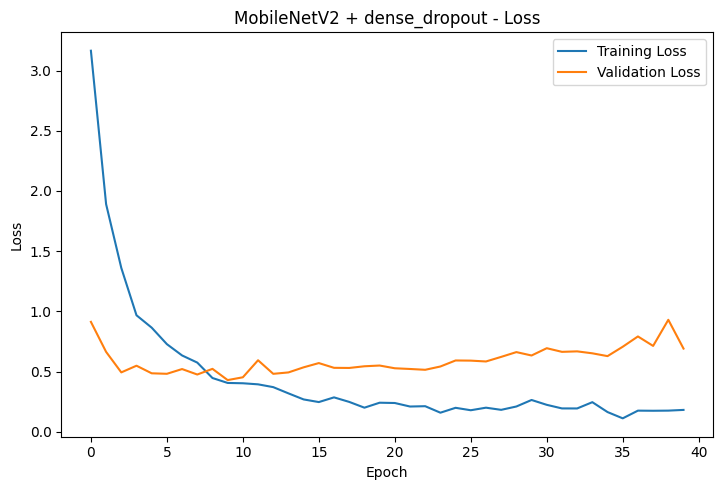

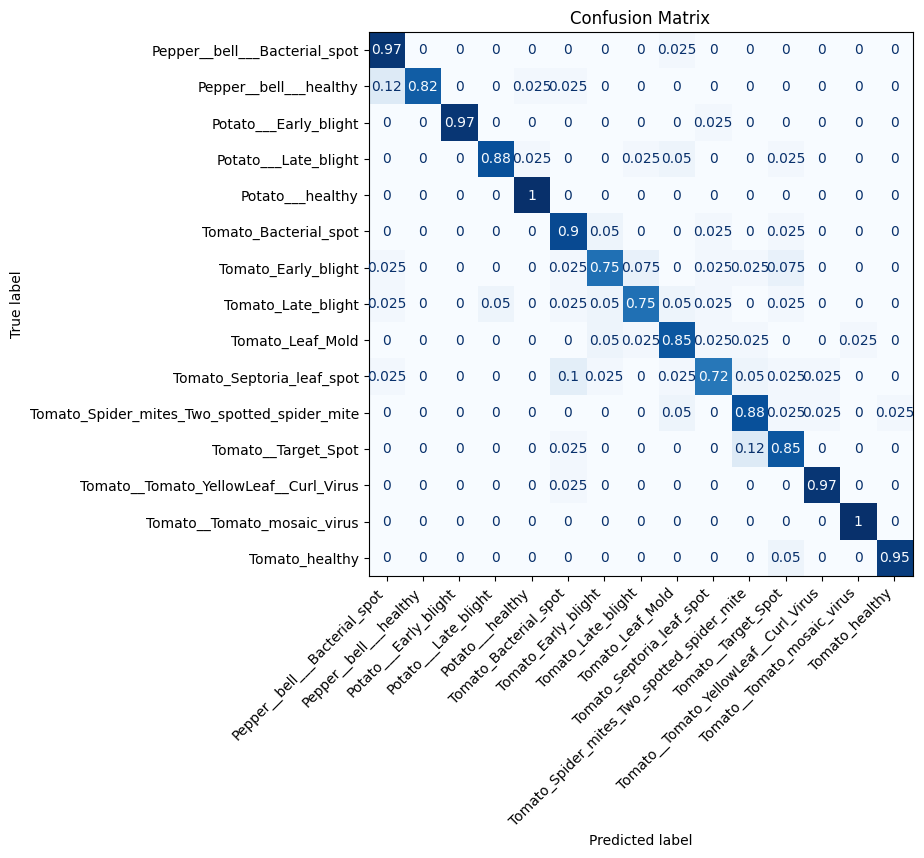

Model: EfficientNetB0 + simple, F1-Score: 0.86%, Accuracy: 6.77%, Final Val_loss: 274.60%


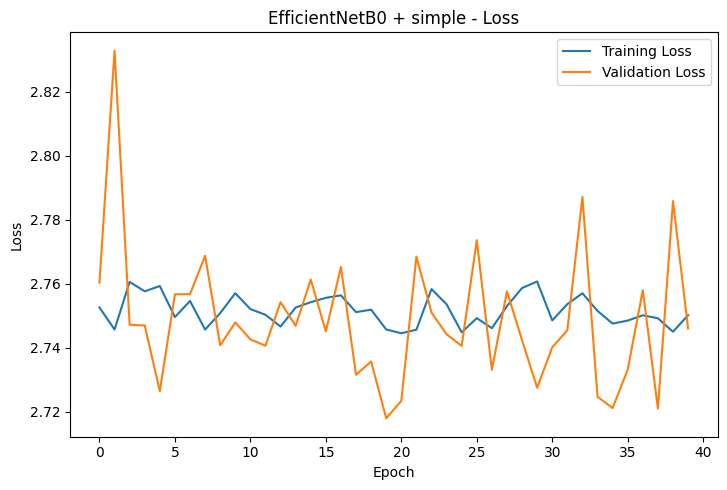

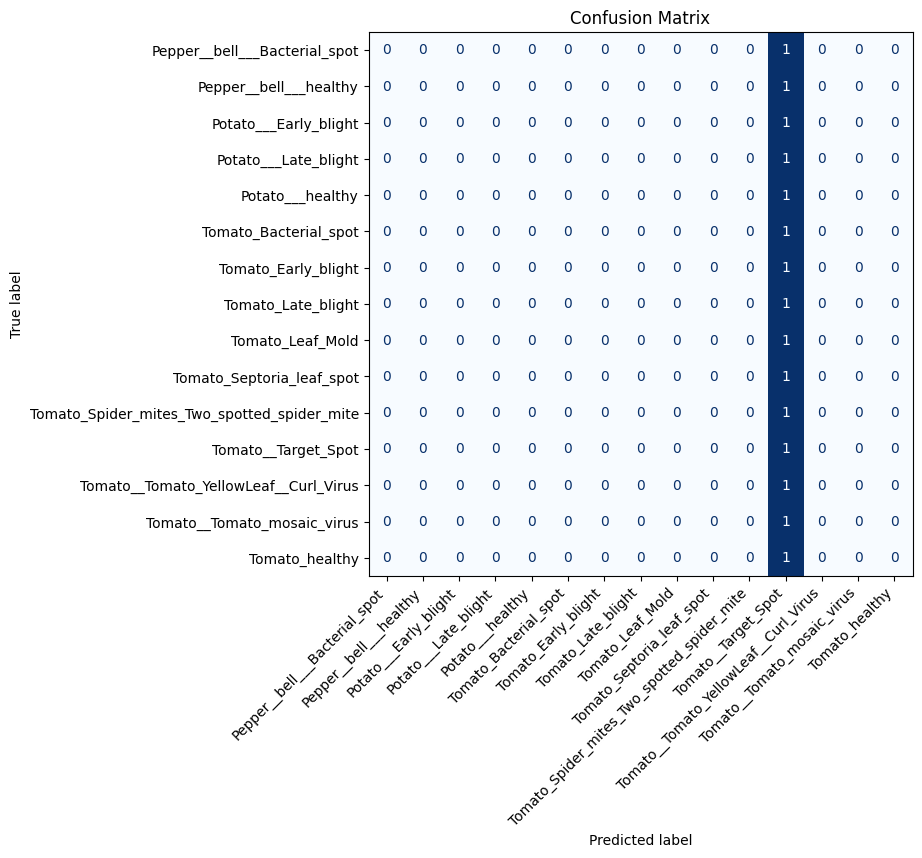

Model: EfficientNetB0 + dense_dropout, F1-Score: 0.86%, Accuracy: 6.77%, Final Val_loss: 272.68%


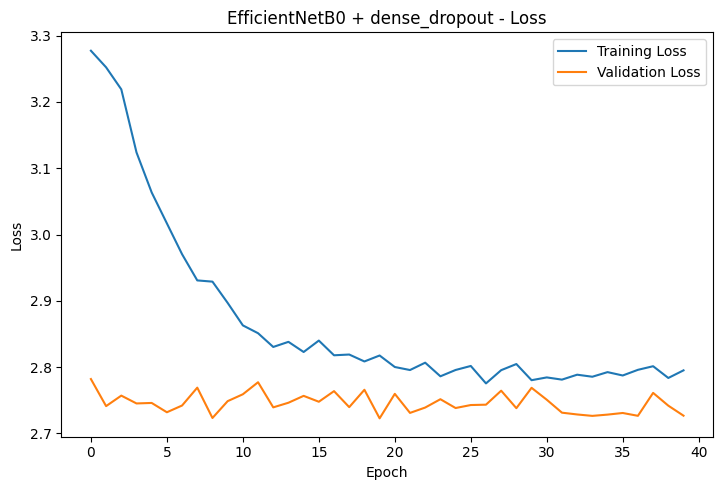

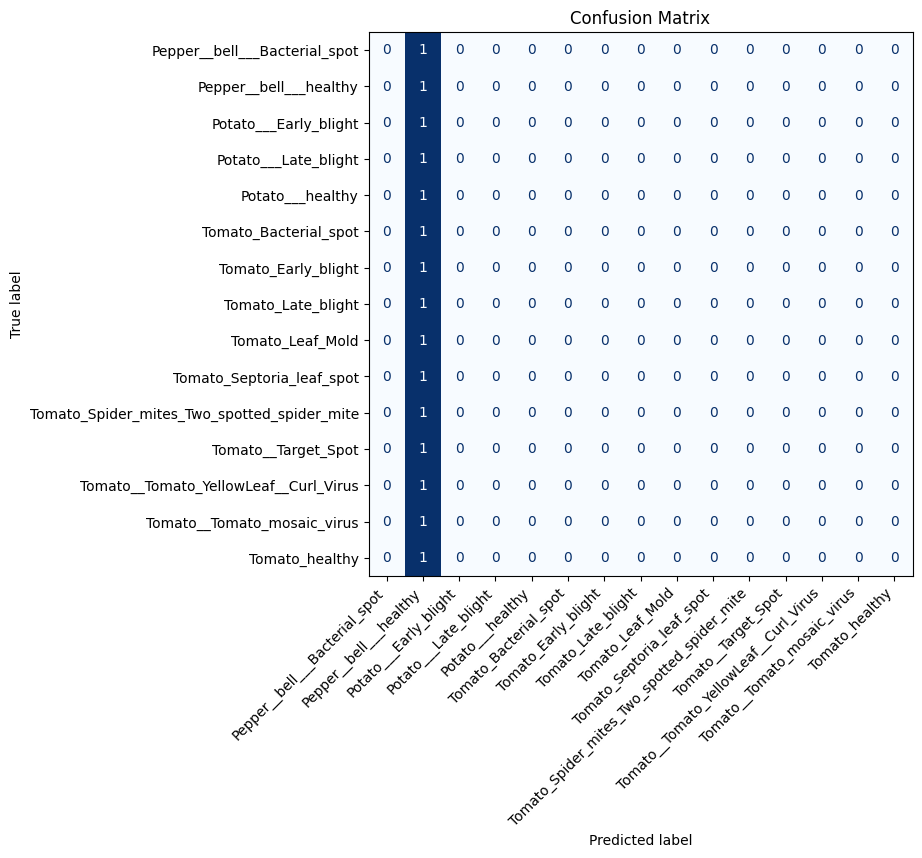

Model: EfficientNetB0 + batchnorm_dropout, F1-Score: 2.01%, Accuracy: 8.80%, Final Val_loss: 272.92%


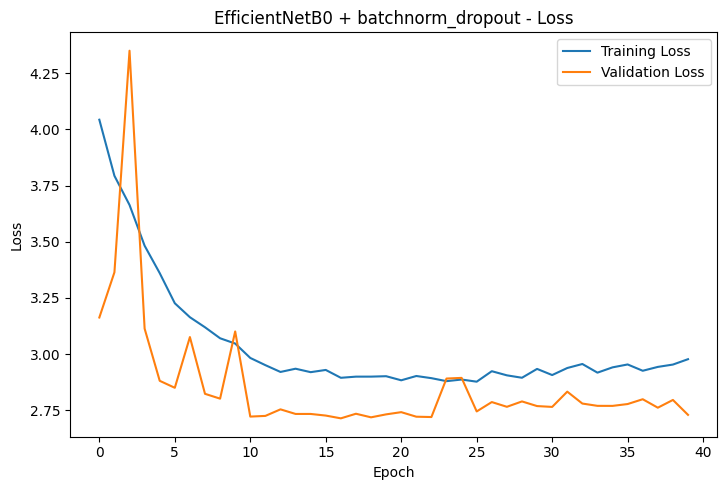

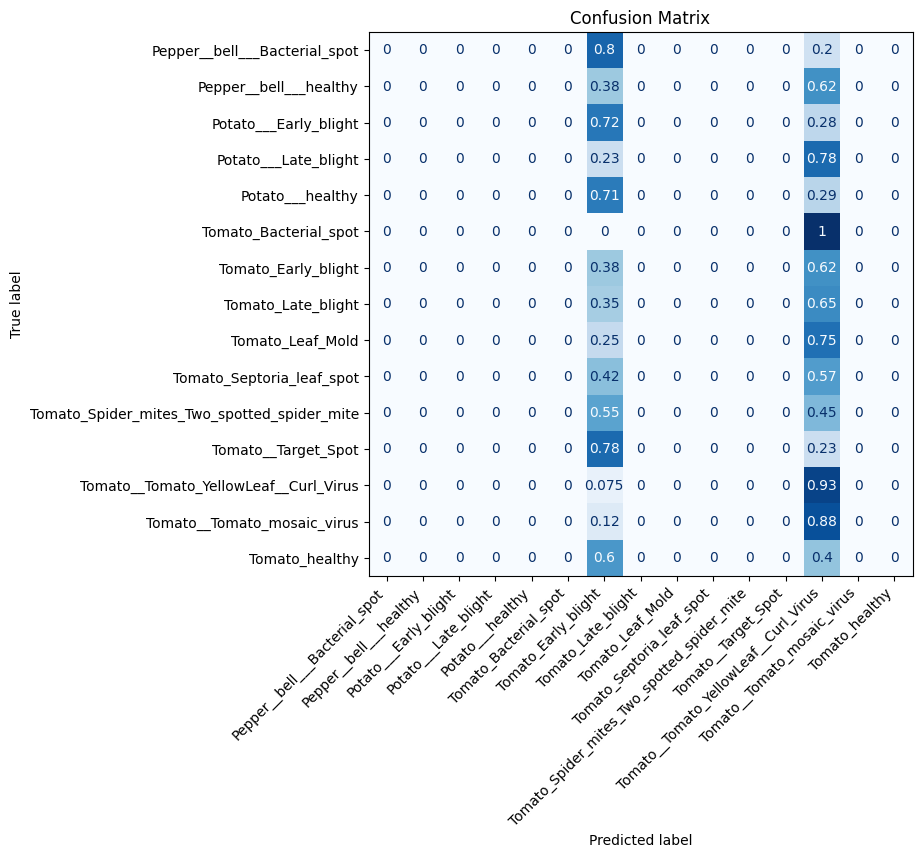

Model: InceptionV3 + simple, F1-Score: 87.69%, Accuracy: 87.82%, Final Val_loss: 39.30%


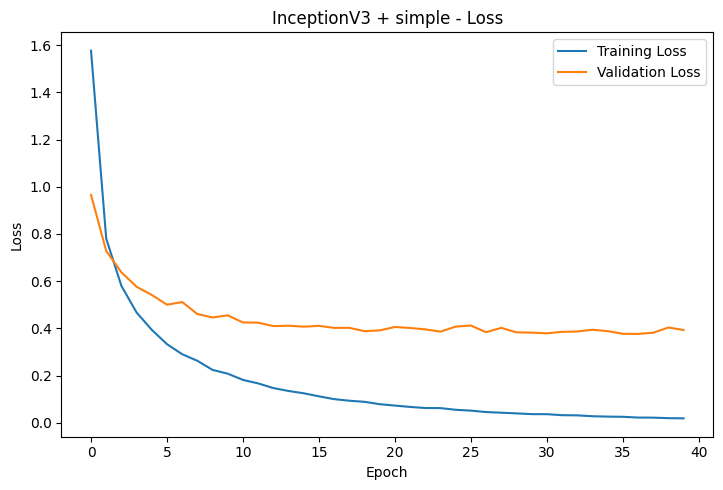

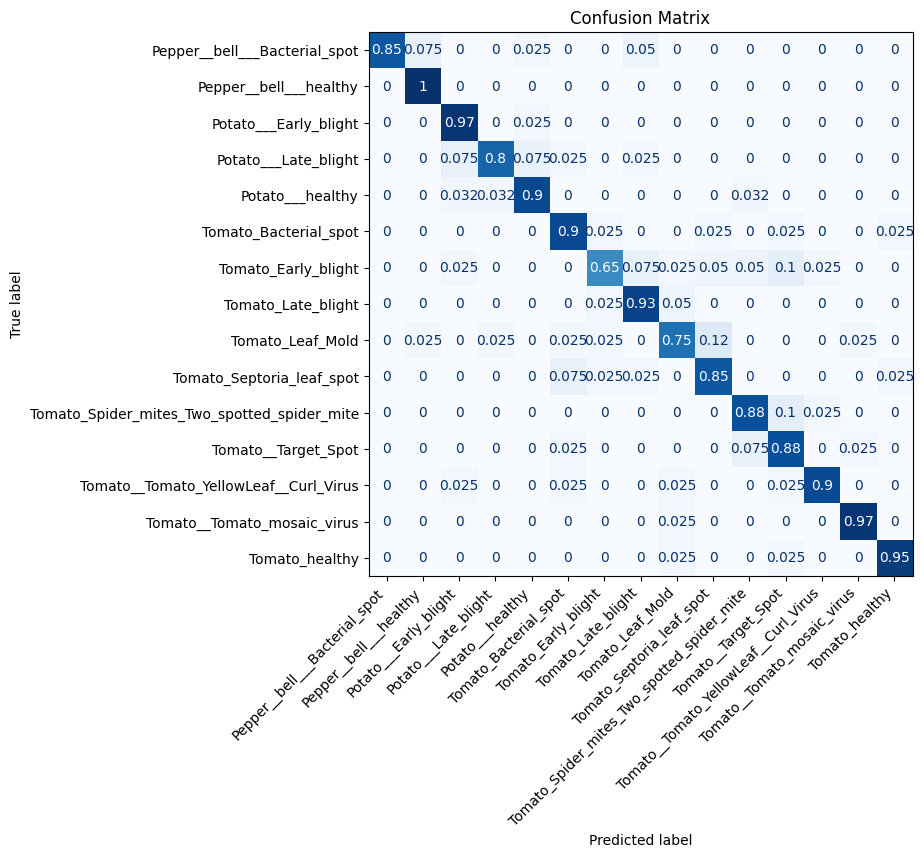

Model: InceptionV3 + dense_dropout, F1-Score: 85.19%, Accuracy: 85.28%, Final Val_loss: 57.84%


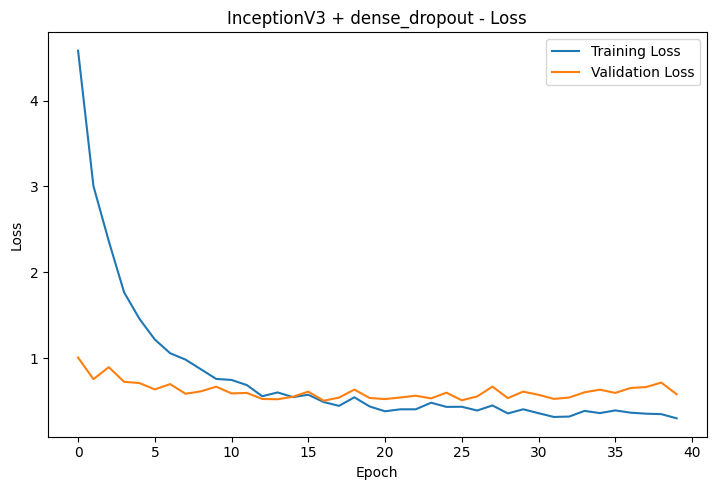

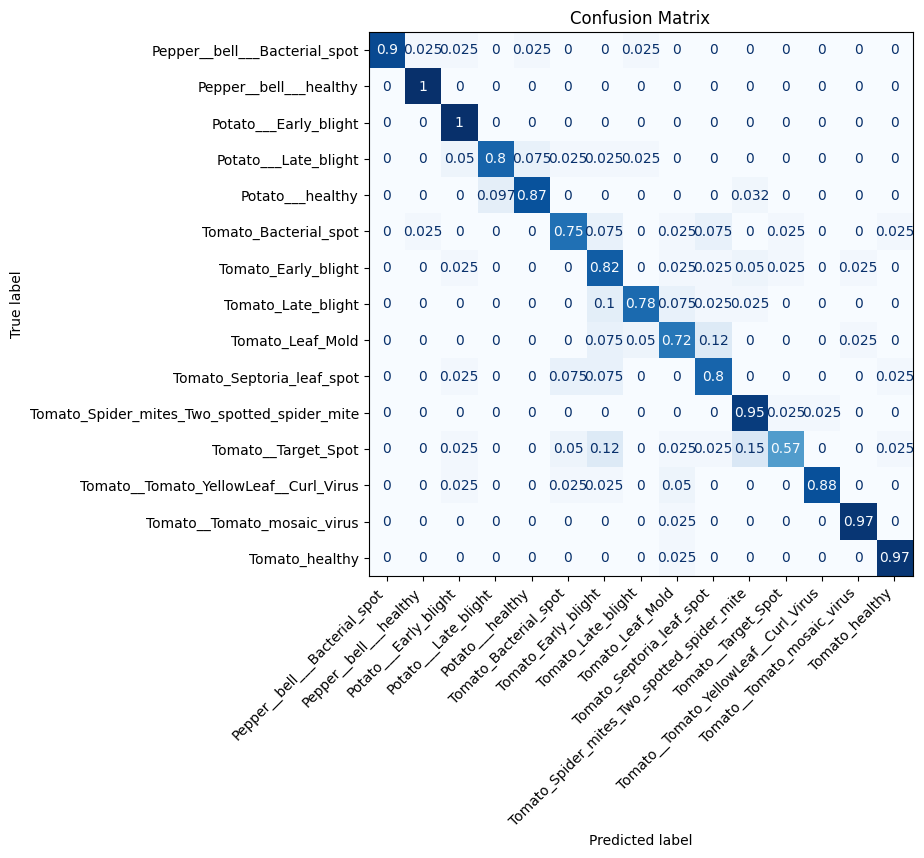

Model: DenseNet121 + simple, F1-Score: 91.07%, Accuracy: 91.03%, Final Val_loss: 29.48%


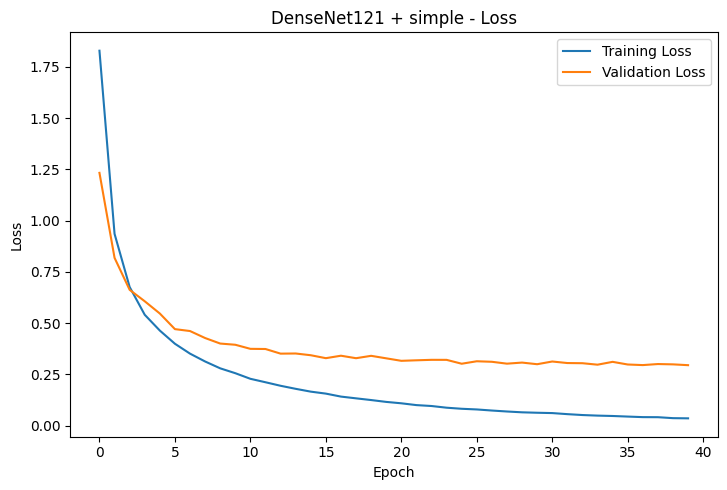

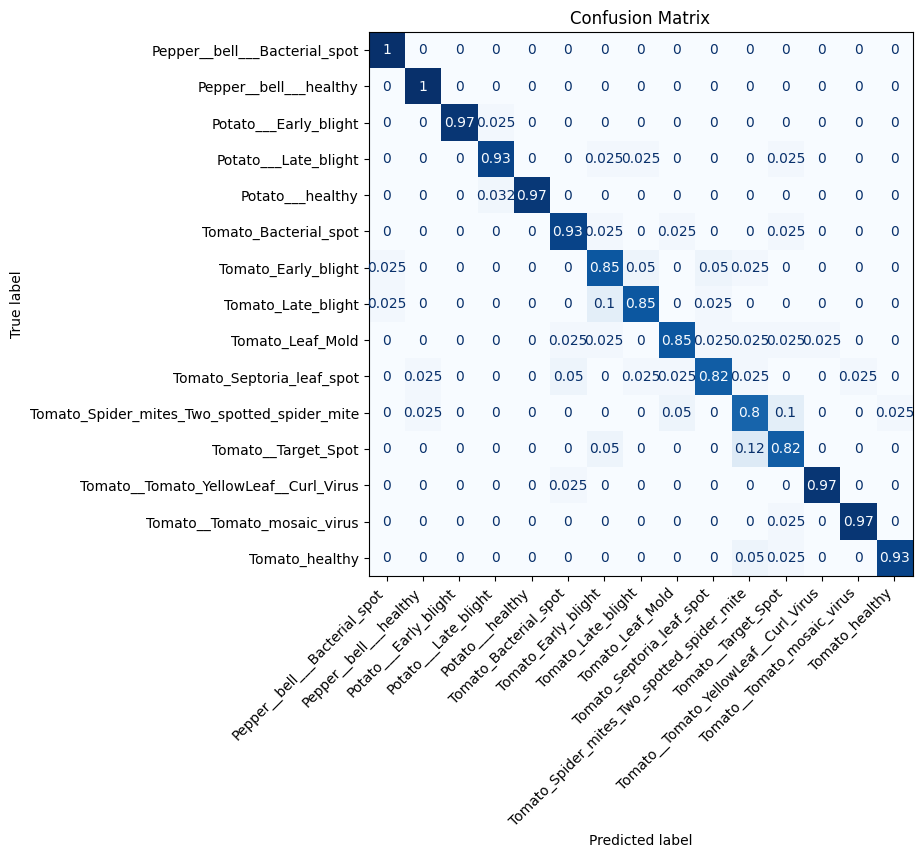

Model: DenseNet121 + dense_dropout, F1-Score: 88.46%, Accuracy: 88.32%, Final Val_loss: 47.00%


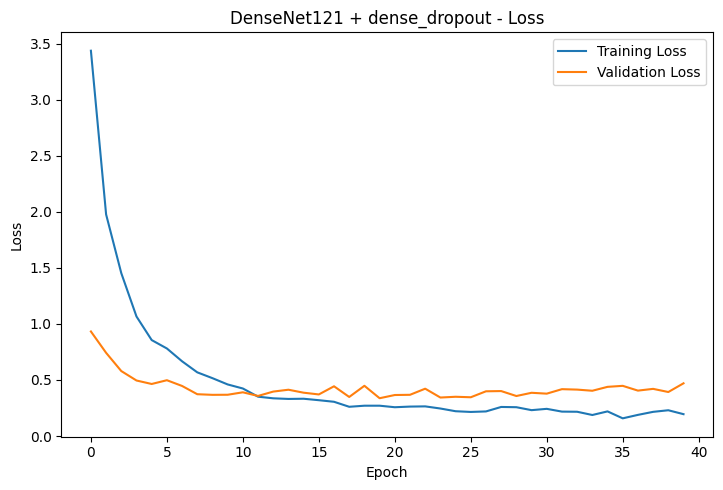

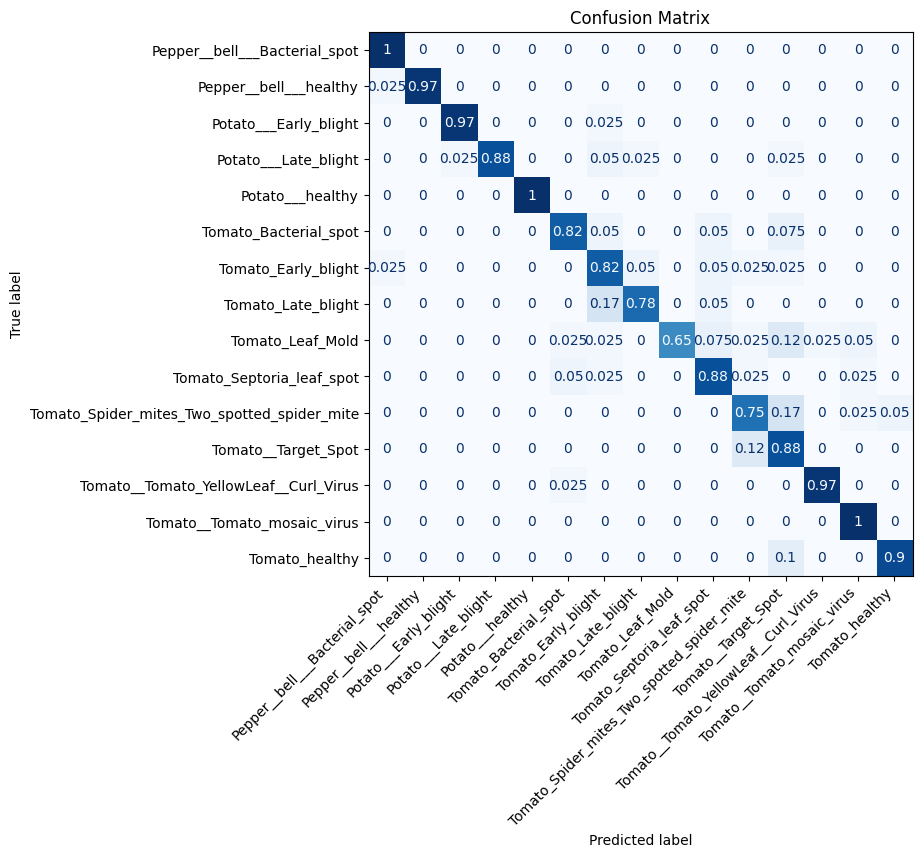

Model: Xception + simple, F1-Score: 86.03%, Accuracy: 85.96%, Final Val_loss: 41.58%


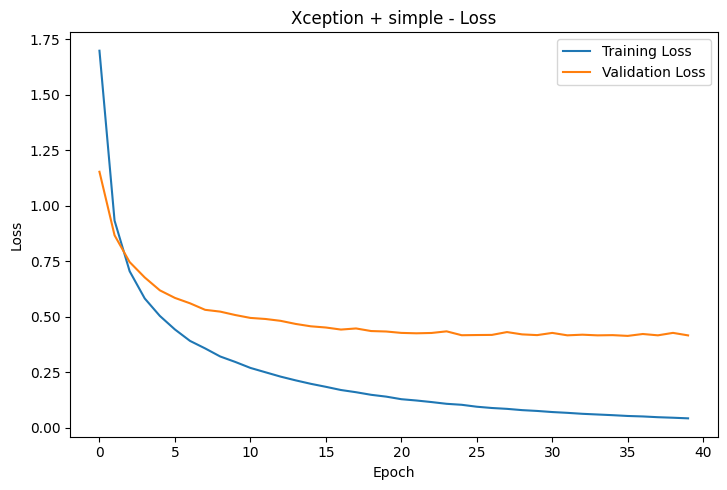

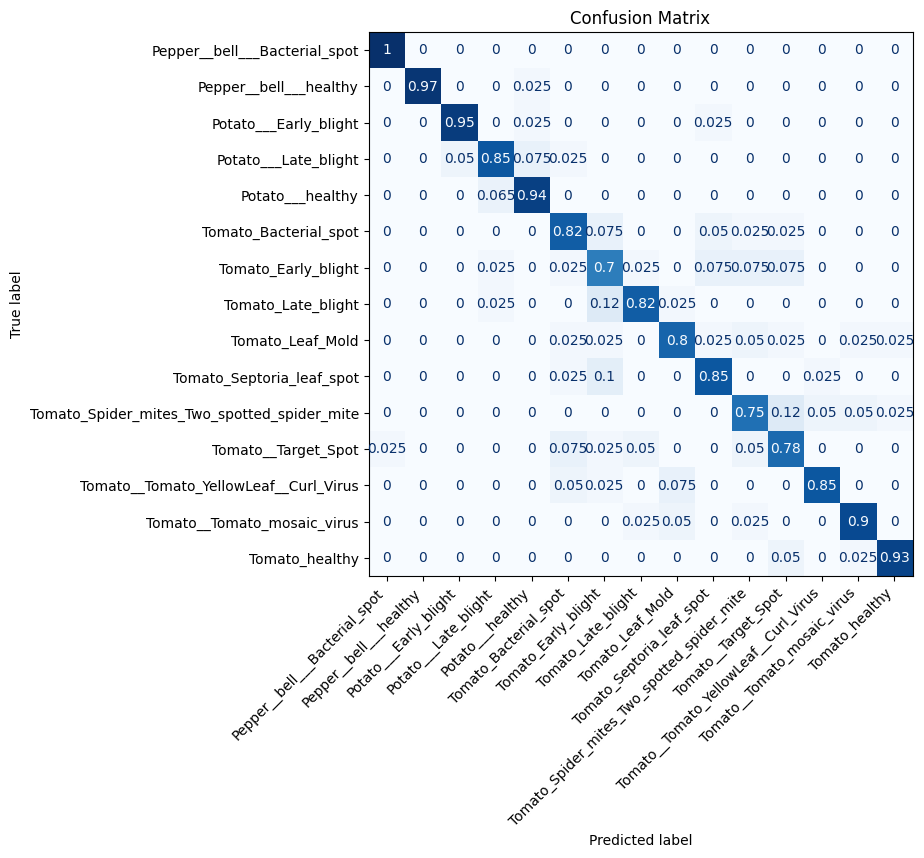

Model: Xception + dense_dropout, F1-Score: 85.38%, Accuracy: 85.45%, Final Val_loss: 58.81%


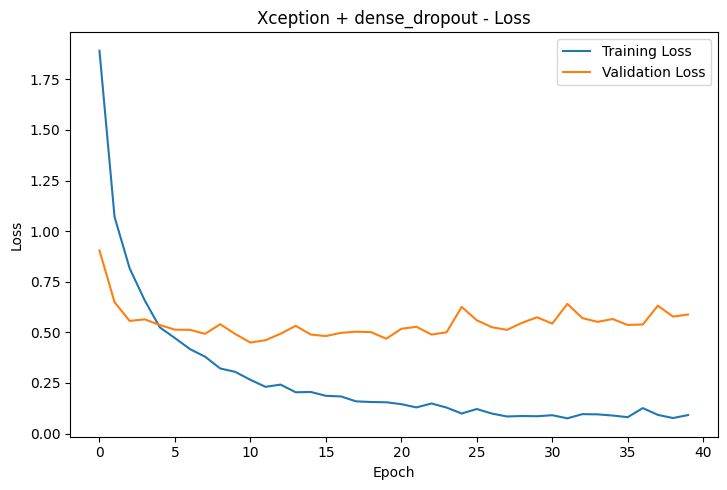

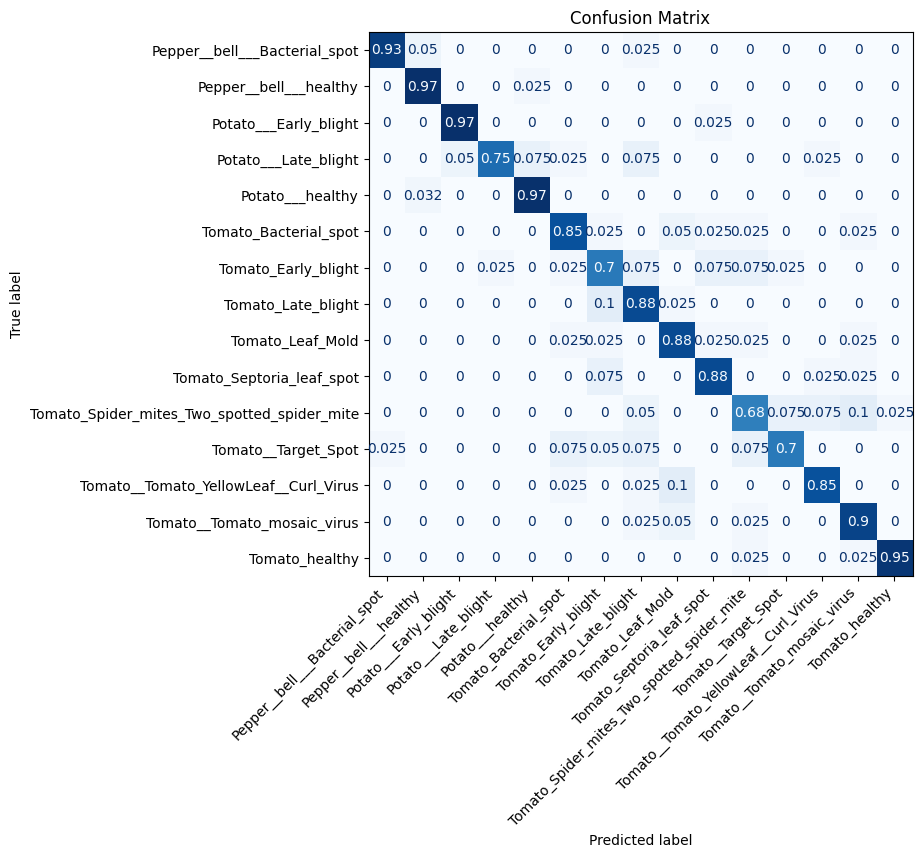

In [5]:
%autoreload 2

# Display results
import matplotlib.pyplot as plt
import seaborn as sns
from visualization_tools import plot_loss_curves, plot_conf_matrix
from data_loader import load_all_results_from_pickles

result_files = {
    "EfficientNetB0": "results_efficientnet_b0.pkl",
    "EfficientNetB3": "results_efficientnet_b3.pkl",
    "InceptionV3": "results_inceptionv3.pkl",
    "MobileNetV2": "results_mobilenet.pkl",
    "DenseNet121": "results_densenet.pkl",
    "Xception": "results_xception.pkl"
}

results = load_all_results_from_pickles(folder_path=".", file_suffix=".pkl")

# print(results)
results.style.format({"accuracy": "{:.2%}", "f1_score": "{:.2%}"})

top_results = results.sort_values(by="f1_score", ascending=False)
display(top_results)
# TODO start loss noch in Tabelle aufnehmen, history, y_true, y_pred defür weg

plt.figure(figsize=(12, 6))
sns.barplot(data=results, x="backbone", y="f1_score", hue="head")
plt.title("F1-Score by Model Backbone and Head")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


for result in results.itertuples():
    print(f"Model: {result.backbone} + {result.head}, F1-Score: {result.f1_score:.2%}, Accuracy: {result.accuracy:.2%}, Final Val_loss: {result.end_val_loss:.2%}")
    # Plot accuracy and loss
    plot_loss_curves(result.history['loss'], result.history['val_loss'], model_name= f"{result.backbone} + {result.head}")

    # Plot confusion matrix
    plot_conf_matrix(
        y_true=result.y_true,
        y_pred=result.y_pred,
        class_names=list(label_map_300.keys()),
        normalize='true'
    )